1. 서포트 벡터 머신의 기본 아이디어는 무엇인가요?

In [1]:
# 클래스 사이에 가능한 가장 넓은 '도로'를 내는 것. -> 마진을 가장 크게하는 것
# 비선형 데이터셋에서 훈련할 때 커널 함수를 사용하는 것.

2. 서포트 벡터가 무엇인가요?

In [2]:
# SVM이 훈련된 후에 경계를 포함해 도로에 높은 어떤 샘플.
# 결정 경계는 전적으로 서포트 벡터에 의해 결정됨.

3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?

In [3]:
# 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있어서.

4. SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있나요?

In [4]:
# decision_function() 매서드를 사용하여 신뢰도 점수를 얻을 수 있음.
# 이 점수: 샘플과 결정 경계 사이의 거리를 나타냄.
# 하지만 이 이 점수를 확률의 추정치로 직접 변환할 수 없음.

5. LinearSVC, SVC, SGDClassifier 중에서 어떤 것을 선택해야 하나요?

In [5]:
# 세 클래스 모두 선형 분류에 사용할 수 있음.
# SVC: 커널트릭을 지원, 비선형 작업도 처리 가능
#      많은 샘플을 가진 데이터셋으로는 잘 확장되지 x
#      많은 개수의 특성으로는 잘 확정됨.
# LinearSVC: 선형 SVM에 최적화된 알고리즘을 구현
# SGDClassifier: 확률적 경사 하강법 사용

6. RBF 커널을 사용해 SVM 분류기를 훈련시켰더니 훈련 세트에 과소적합된 것 같습니다. gamma를 증가시켜야 할까요, 감사소켜야 할까요? C의 경우는 어떤가요?

In [1]:
# 규제를 줄이기 위해서는 gamma,C 모두 증가시켜야함.

7. 모델이 입실론 ε에 민감하다는 것은 무슨 의미인가요?

In [2]:
# 회귀 SVM 모델은 작은 마진 내에 최대한 많은 샘플을 예측하도록 훈련함.
# 마진 내에 샘플을 추가하면 모델에 전혀 영향을 주지 않는데
# -> 이를 ε에 민감하지 않다고 말함.

8. 커널 트릭을 사용하는 이유는 무엇인가요?

In [3]:
# 커널 트릭: 비선형 SVM 모델을 훈련할 수 있게 해주는 수학적 기법
# 비선형 변환을 사용하여 입력을 다른 공간에 매핑한 다음, 고차원 입력에서 선형 SVM을 훈련하는 것과 동일.
# 입력을 전혀 변환하지 않고도 동일한 결과를 제공.

9. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC 와 SGDClassifier를 적용해 보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

In [5]:
# 붓꽃 데이터셋 사용
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)

from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

* LinearSVC는 기본적으로 loss="squared_hinge"를 사용하므로 세 모델 모두 비슷한 결과를 얻으려면 loss="hinge"로 지정해야 한다는 점을 기억하세요.
* 또한 SVC 클래스는 기본적으로 RBF 커널을 사용하므로 다른 두 모델과 유사한 결과를 얻으려면 kernel="linear"로 지정해야 합니다.
* 마지막으로, SGDClassifier 클래스에는 C 하이퍼파라미터가 없지만 alpha라는 다른 규제 하이퍼파라미터가 있으므로 이를 조정하여 다른 두 모델과 유사한 결과를 얻을 수 있습니다.

In [8]:
# 3가지 모델 사용하기
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

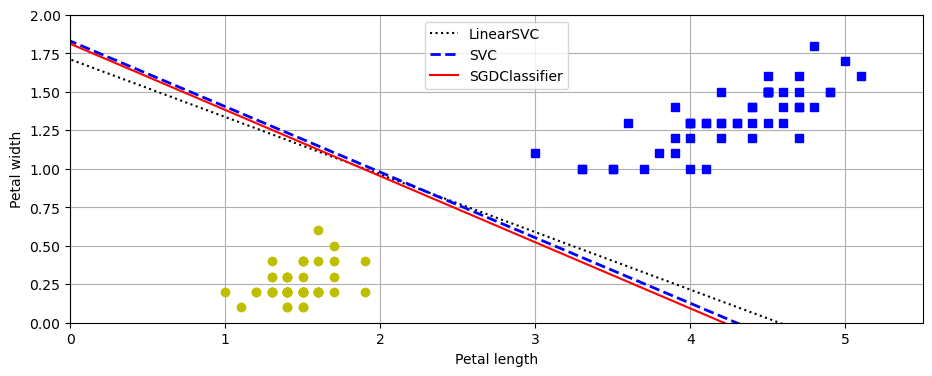

In [10]:
# 시각화
import matplotlib.pyplot as plt

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# 세 가지 결정 경계를 모두 그리기
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

10. sklearn.datasets.load_wine()을 사용해 로드할 수 있는 와인 데이터셋에서 SVM 분류기를 훈련하세요. 이 데이터셋에는 세 명의 다른 재배자에서 생산된 178개의 와인 샘플에 대한 화학 성분이 포함되어 있습니다. 목표는 와인의 화학 성분을 기반으로 재배자를 예측할 수 있는 분류 모델을 훈련하는 것입니다. SVM 분류기는 이진 분류기이므로 세 가지 클래스를 모두 분류하려면 OvA를 사용해야 합니다. 어느 정도의 정확도에 도달할 수 있나요?

In [11]:
# 데이터 셋 다운
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [13]:
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [14]:
# 훈련 세트와 테스트 세트 분할
from sklearn.model_selection import train_test_split

X_train, X_tes, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [15]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [19]:
# 선형 SVM 분류기(OvR)
# 특성 스케일 조정하기 !!
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lin_clf = make_pipeline(StandardScaler(),
                       LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [20]:
# 성능 측정 정확도
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [21]:
# 커널 SVM 분류기
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

In [22]:
# 하이퍼파라미터 튜닝 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901176,
                     random_state=42))])

In [23]:
# 점수
rnd_search_cv.best_score_

0.9925925925925926

In [25]:
# 테스트 세트 적용
rnd_search_cv.score(X_tes, y_test)

0.9777777777777777

11. 캘리포니아 주택 데이터셋에서 SVM 회귀 모델을 훈련하고 미세 튜닝하세요. 2장에서 수정한 버전이 아닌 sklearn.datasets.fetch_california_housing()으로 로드한 원본 데이터셋을 사용할 수 있습니다. 타깃 값은 십만 달러 단위입니다. 샘플이 20,000개가 넘기 때문에 SVM이 느려질 수 있습니다. 따라서 하이퍼파라미터 튜닝을 할 때 훨씬 적은 샘플(예를 들어 2,000개)를 사용하여 더 많은 하이퍼파라미터 조합을 테스트해야 합니다. 가장 좋은 모델의 RMSE는 얼마인가요?

In [26]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [27]:
# 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [28]:
# 데이터 스케일 조정!!
# LinearSVR적용
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [30]:
# 성능 평가
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [32]:
# rmse
import numpy as np
np.sqrt(mse)

0.979565447829459

In [33]:
# RBF 커널 모델 적용
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001522C50D3D0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001522C50D070>},
                   random_state=42)

In [34]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485974))])

In [35]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [36]:
# RBF 커널 모형 선택
# 테스트 세트에서 평가해 보기

y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.5854732265172223